<a href="https://colab.research.google.com/github/Jay5852/100-days-machine-learning-daily-practice/blob/main/outlier_detection/iqr_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


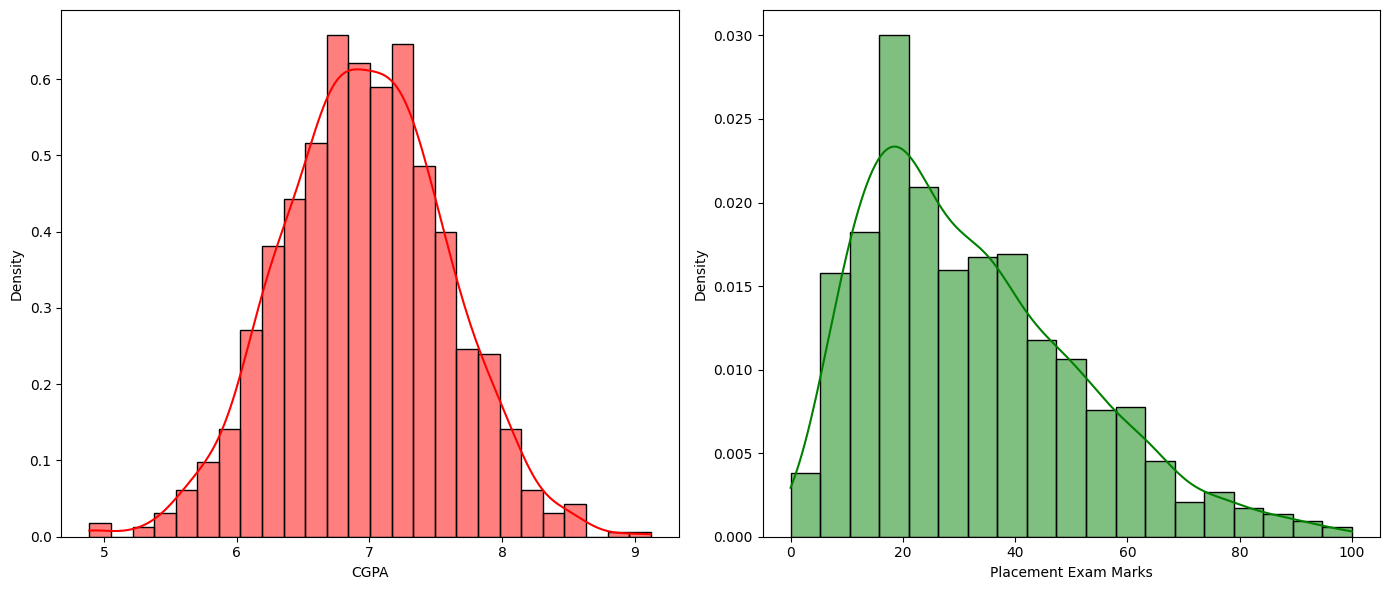

In [6]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True,stat='density',color='red')
plt.xlabel("CGPA")
plt.ylabel("Density")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True,stat='density',color='green')
plt.xlabel("Placement Exam Marks")
plt.ylabel("Density")

plt.tight_layout()

plt.show()


In [7]:
# we can check the skweness of the data using
df['placement_exam_marks'].skew()  # Right Skewed

np.float64(0.8356419499466834)

In [9]:
df['cgpa'].skew()  # Normally Distributed

np.float64(-0.014529938929314918)

In [10]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


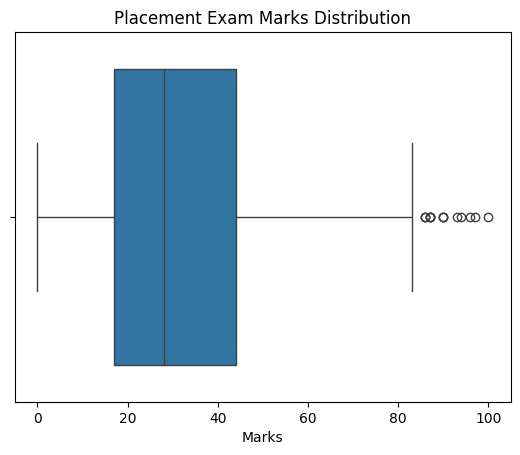

In [19]:
sns.boxplot(x =df['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution')
plt.xlabel('Marks')
plt.show()




In [20]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [21]:
percentile25,percentile75

(np.float64(17.0), np.float64(44.0))

In [22]:
iqr = percentile75 - percentile25


In [23]:
iqr

np.float64(27.0)

In [24]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [25]:
print("UpperLimit",upper_limit)
print("LowerLimit",lower_limit)

UpperLimit 84.5
LowerLimit -23.5


# Detecting Outliers

In [28]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [29]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Methods
## 1.Trimming

In [30]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [31]:
new_df.shape

(985, 3)

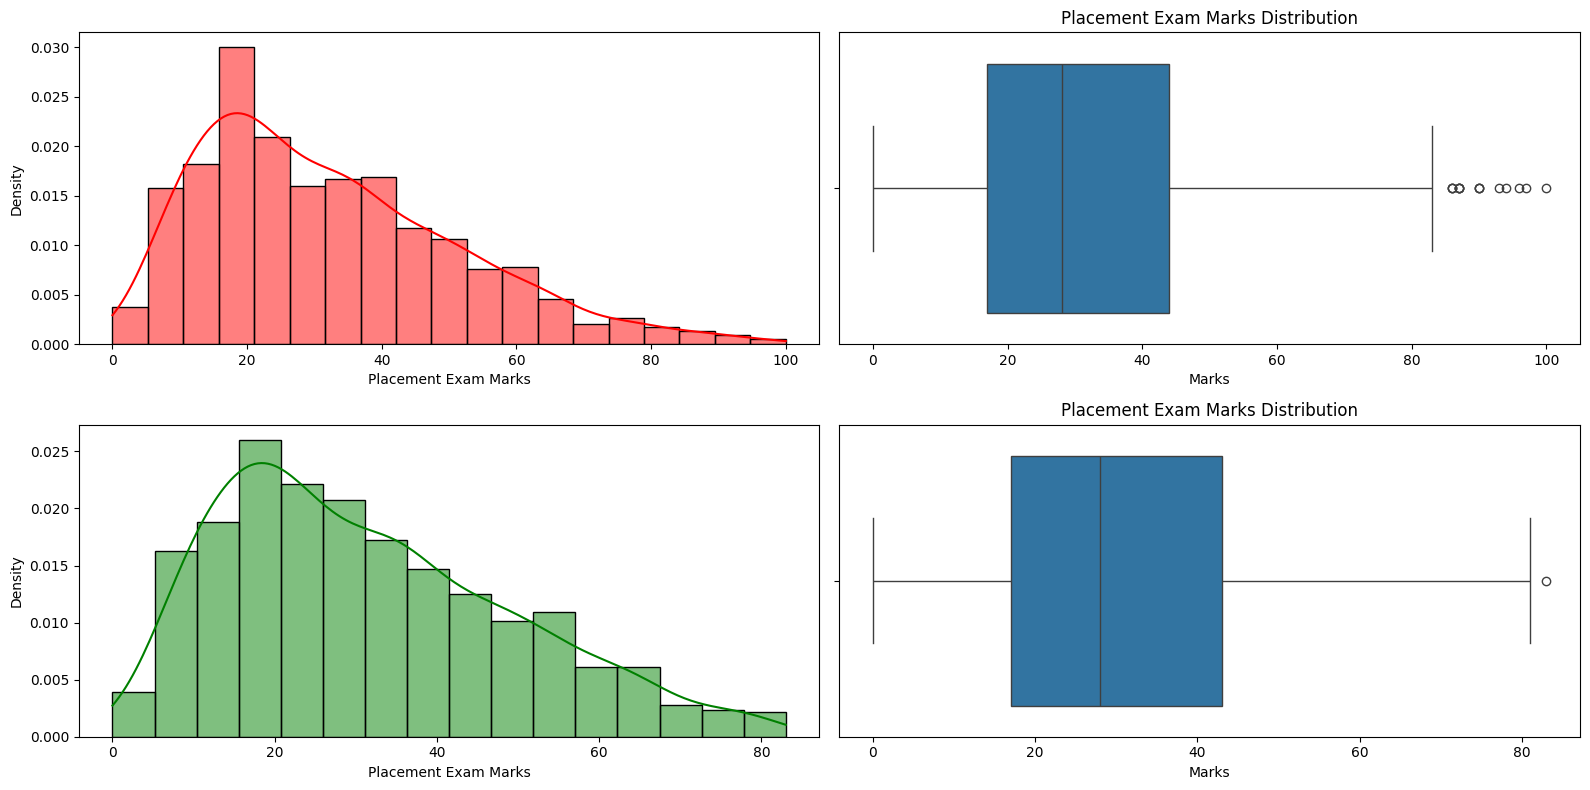

In [32]:
# Checking the distribution
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,stat='density',color='red')
plt.xlabel("Placement Exam Marks")
plt.ylabel("Density")

plt.subplot(2,2,2)
sns.boxplot(x =df['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution')
plt.xlabel('Marks')

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde=True,stat='density',color='green')
plt.xlabel("Placement Exam Marks")
plt.ylabel("Density")

plt.subplot(2,2,4)
sns.boxplot(x =new_df['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution')
plt.xlabel('Marks')

plt.tight_layout()
plt.show()


## 2. Capping

In [37]:
new_df2 = df.copy()

In [38]:
# np.where(condition,true,false)

new_df2['placement_exam_marks'] = np.where(
    new_df2['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df2['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df2['placement_exam_marks']

    )
)

In [47]:
new_df2.shape

(1000, 3)

In [39]:
new_df2.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [41]:
print("UpperLimit",upper_limit)
print("LowerLimit",lower_limit)

UpperLimit 84.5
LowerLimit -23.5


In [44]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [46]:
new_df2['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000


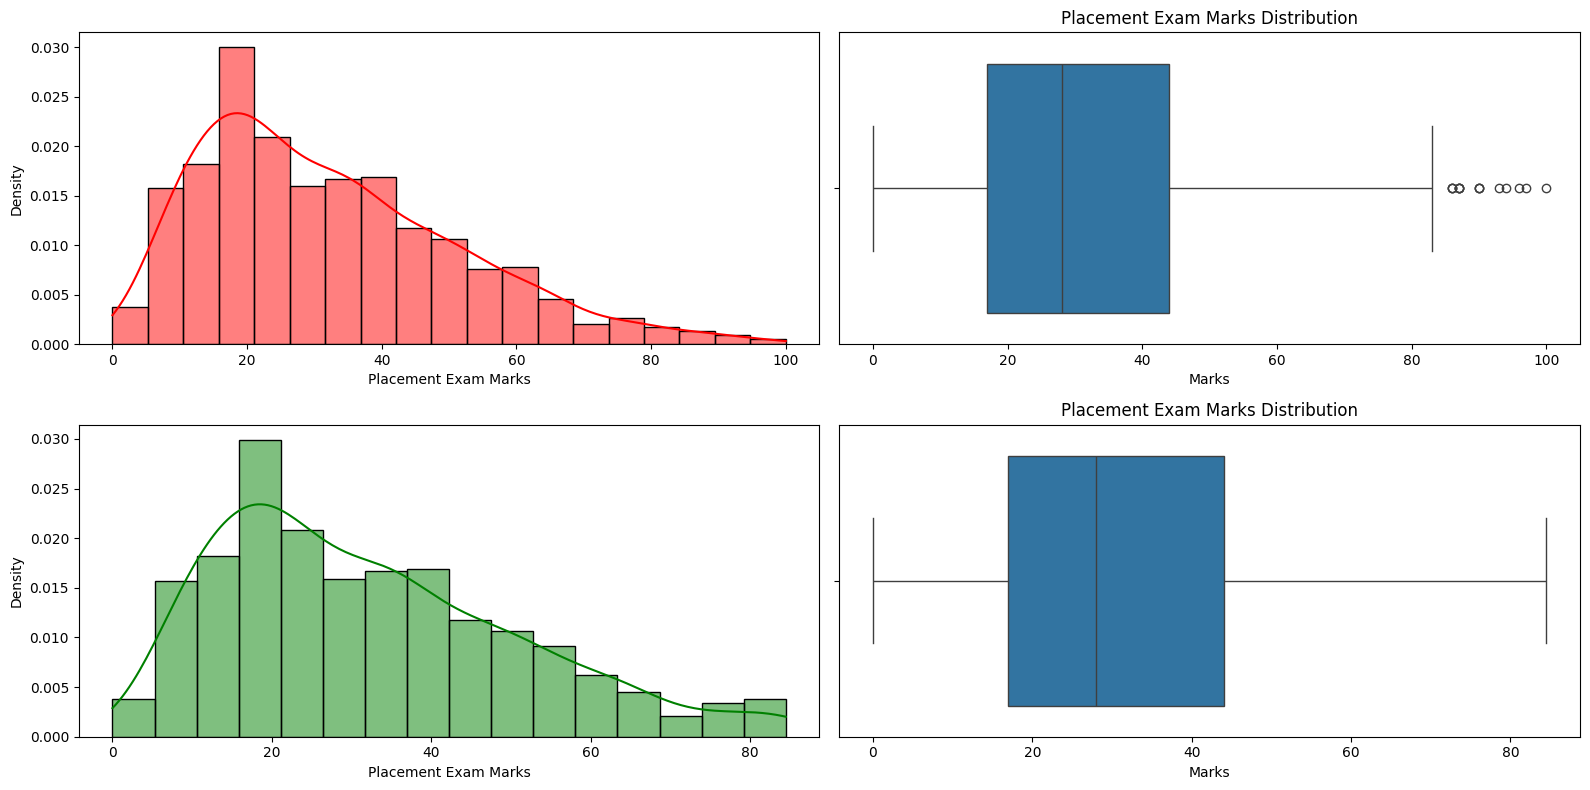

In [48]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True,stat='density',color='red')
plt.xlabel("Placement Exam Marks")
plt.ylabel("Density")

plt.subplot(2,2,2)
sns.boxplot(x =df['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution')
plt.xlabel('Marks')

plt.subplot(2,2,3)
sns.histplot(new_df2['placement_exam_marks'],kde=True,stat='density',color='green')
plt.xlabel("Placement Exam Marks")
plt.ylabel("Density")

plt.subplot(2,2,4)
sns.boxplot(x =new_df2['placement_exam_marks'])
plt.title('Placement Exam Marks Distribution')
plt.xlabel('Marks')

plt.tight_layout()
plt.show()
